In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime
from wordcloud import WordCloud
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. 파일호출

In [11]:
# 파일 불러오기
with open('../../data/df_wl.pkl', 'rb') as f:
    df_wl = pickle.load(f)


In [12]:
df_wl['wl_list'] = df_wl['over4'].apply(lambda x : [len(w) for w in x])

In [13]:
df_wl['wl_6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) ==6])

In [14]:
df_wl['wl_6_len'] = df_wl['wl_6'].apply(lambda x : len(x) )

In [15]:
df_wl['c_date'] = pd.to_datetime(df_wl['creationdate']).dt.date

In [16]:
gpt_date = datetime.date(2022,11,30)


In [17]:
df_wl['diff_day'] = df_wl['c_date'].values - gpt_date
df_wl['diff_day'] = df_wl['diff_day'].dt.days
# - gpt_date
# -gpt_date

In [23]:
df_wl['diff_week'] = df_wl['diff_day'].apply(lambda x  : math.ceil(x/7))

In [28]:
df_wl['diff_week'].max()

53

In [24]:
df_wl

,id,creationdate,body_prep,over4,wl_list,wl_6,wl_6_len,c_date,diff_day,diff_week
0,77368423,2023-10-26 15:34:53.830,If all machines are on the same LAN then you c...,"[machines, instructs, Xdebug, connect, address...","[8, 9, 6, 7, 7, 6, 7, 10, 7, 7, 8, 6, 5, 10, 5...","[Xdebug, header, Xdebug, listen, Xdebug, eithe...",15,2023-10-26,330,48
1,77401389,2023-11-01 08:52:42.577,I am trying to automate a webpage using Seleni...,"[trying, automate, webpage, using, Selenium, h...","[6, 8, 7, 5, 8, 8, 7, 5, 5, 5, 5, 7, 10, 8, 14...","[trying, cannot, upload, upload, AutoIt]",5,2023-11-01,336,48
2,77389520,2023-10-30 14:32:47.247,I want to run a macro if a cell changes based ...,"[macro, changes, based, changed, value, instan...","[5, 7, 5, 7, 5, 8, 6, 7, 5, 5, 11, 11, 11, 5, ...","[column, change, Namely, unique, occurs, colum...",7,2023-10-30,334,48
3,77389551,2023-10-30 14:36:20.843,Whilst you could write your own wrapper for I...,"[Whilst, could, write, wrapper, would, probabl...","[6, 5, 5, 7, 5, 8, 7, 6, 7]","[Whilst, vector]",2,2023-10-30,334,48
4,77344034,2023-10-23 09:20:47.107,I am using ASPNET Identity The login app is NE...,"[using, ASPNET, Identity, login, themselves, f...","[5, 6, 8, 5, 10, 8, 7, 5, 5, 47, 11, 13, 7, 13...","[ASPNET, enough, claims, cookie, larger, doesn...",7,2023-10-23,327,47
...,...,...,...,...,...,...,...,...,...,...
43417095,70631775,2022-01-08 11:12:48.283,To change particle amp background colour you n...,"[change, particle, background, colour, adjust,...","[6, 8, 10, 6, 6, 5, 6, 12, 7, 6, 8, 7, 6, 5, 8...","[change, colour, adjust, values, config, adjus...",10,2022-01-08,-326,-46
43417096,70598711,2022-01-05 19:38:07.140,you need to tell spring how to route your requ...,"[spring, route, requestby, default, spring, fi...","[6, 5, 9, 7, 6, 6, 10, 9, 121, 5, 9, 8, 6, 6, ...","[spring, spring, figure, create, should, revie...",7,2022-01-05,-329,-47
43417097,70587610,2022-01-05 03:50:11.433,Issue and workaroundI think that in the curren...,"[Issue, workaroundI, think, current, stage, ca...","[5, 11, 5, 7, 5, 6, 8, 8, 8, 10, 7, 5, 9, 12, ...","[cannot, sample, dialog, Google, Google, opene...",29,2022-01-05,-329,-47
43417098,70572188,2022-01-03 22:37:26.197,The code Should work like thisread a character...,"[Should, thisread, character, input, uppercase...","[6, 8, 9, 5, 9, 12, 7, 5, 9, 9, 7, 9, 10, 8, 6...","[Should, newest, letter, should]",4,2022-01-03,-331,-47


In [33]:
# 당일 제외하자
df_wl = df_wl[df_wl['diff_day'] !=0]

In [36]:
df_wl['q_treat'] = np.where(df_wl['diff_day']>0, 1, 0)

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_24729/3975482473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl['q_treat'] = np.where(df_wl['diff_day']>0, 1, 0)


In [37]:
df_wl

,id,creationdate,body_prep,over4,wl_list,wl_6,wl_6_len,c_date,diff_day,diff_week,q_treat
0,77368423,2023-10-26 15:34:53.830,If all machines are on the same LAN then you c...,"[machines, instructs, Xdebug, connect, address...","[8, 9, 6, 7, 7, 6, 7, 10, 7, 7, 8, 6, 5, 10, 5...","[Xdebug, header, Xdebug, listen, Xdebug, eithe...",15,2023-10-26,330,48,1
1,77401389,2023-11-01 08:52:42.577,I am trying to automate a webpage using Seleni...,"[trying, automate, webpage, using, Selenium, h...","[6, 8, 7, 5, 8, 8, 7, 5, 5, 5, 5, 7, 10, 8, 14...","[trying, cannot, upload, upload, AutoIt]",5,2023-11-01,336,48,1
2,77389520,2023-10-30 14:32:47.247,I want to run a macro if a cell changes based ...,"[macro, changes, based, changed, value, instan...","[5, 7, 5, 7, 5, 8, 6, 7, 5, 5, 11, 11, 11, 5, ...","[column, change, Namely, unique, occurs, colum...",7,2023-10-30,334,48,1
3,77389551,2023-10-30 14:36:20.843,Whilst you could write your own wrapper for I...,"[Whilst, could, write, wrapper, would, probabl...","[6, 5, 5, 7, 5, 8, 7, 6, 7]","[Whilst, vector]",2,2023-10-30,334,48,1
4,77344034,2023-10-23 09:20:47.107,I am using ASPNET Identity The login app is NE...,"[using, ASPNET, Identity, login, themselves, f...","[5, 6, 8, 5, 10, 8, 7, 5, 5, 47, 11, 13, 7, 13...","[ASPNET, enough, claims, cookie, larger, doesn...",7,2023-10-23,327,47,1
...,...,...,...,...,...,...,...,...,...,...,...
43417095,70631775,2022-01-08 11:12:48.283,To change particle amp background colour you n...,"[change, particle, background, colour, adjust,...","[6, 8, 10, 6, 6, 5, 6, 12, 7, 6, 8, 7, 6, 5, 8...","[change, colour, adjust, values, config, adjus...",10,2022-01-08,-326,-46,0
43417096,70598711,2022-01-05 19:38:07.140,you need to tell spring how to route your requ...,"[spring, route, requestby, default, spring, fi...","[6, 5, 9, 7, 6, 6, 10, 9, 121, 5, 9, 8, 6, 6, ...","[spring, spring, figure, create, should, revie...",7,2022-01-05,-329,-47,0
43417097,70587610,2022-01-05 03:50:11.433,Issue and workaroundI think that in the curren...,"[Issue, workaroundI, think, current, stage, ca...","[5, 11, 5, 7, 5, 6, 8, 8, 8, 10, 7, 5, 9, 12, ...","[cannot, sample, dialog, Google, Google, opene...",29,2022-01-05,-329,-47,0
43417098,70572188,2022-01-03 22:37:26.197,The code Should work like thisread a character...,"[Should, thisread, character, input, uppercase...","[6, 8, 9, 5, 9, 12, 7, 5, 9, 9, 7, 9, 10, 8, 6...","[Should, newest, letter, should]",4,2022-01-03,-331,-47,0


In [38]:
model = smf.ols('wl_6_len ~ C(diff_week, Treatment(reference=-53)) * q_treat', data=df_wl).fit(cov_type='HC1')

In [41]:
coefs = pd.DataFrame({
    'Estimate': model.params,
    'Std. Error': model.bse
})
coefs = coefs[coefs.index.str.contains('diff_week')]
coefs = coefs.reset_index()
coefs.columns = ['term', 'Estimate', 'Std. Error']


In [57]:
coefs

,term,Estimate,Std. Error,period,ll_95,ul_95
0,"C(diff_week, Treatment(reference=-53))[T.-52]",9.315293e+06,3.530488e+07,-52,-6.005880e+07,7.868939e+07
1,"C(diff_week, Treatment(reference=-53))[T.-51]",9.315293e+06,3.530488e+07,-51,-6.005880e+07,7.868939e+07
2,"C(diff_week, Treatment(reference=-53))[T.-50]",9.315293e+06,3.530488e+07,-50,-6.005880e+07,7.868939e+07
3,"C(diff_week, Treatment(reference=-53))[T.-49]",9.315293e+06,3.530488e+07,-49,-6.005880e+07,7.868939e+07
4,"C(diff_week, Treatment(reference=-53))[T.-48]",9.315293e+06,3.530488e+07,-48,-6.005880e+07,7.868939e+07
...,...,...,...,...,...,...
205,"C(diff_week, Treatment(reference=-53))[T.49]:q...",1.788337e+10,1.781128e+10,49,-1.711580e+10,5.288254e+10
206,"C(diff_week, Treatment(reference=-53))[T.50]:q...",1.587795e+10,1.586079e+10,50,-1.528849e+10,4.704440e+10
207,"C(diff_week, Treatment(reference=-53))[T.51]:q...",-5.221647e+09,5.181697e+09,51,-1.540368e+10,4.960388e+09
208,"C(diff_week, Treatment(reference=-53))[T.52]:q...",1.402103e+11,1.410974e+11,52,-1.370461e+11,4.174667e+11


In [58]:
# 예를 들어 'C(q_rel_week, Treatment(reference=-8))[T.-7]:q_treat[T.True]'에서 숫자 부분을 추출
coefs['period'] = coefs['term'].str.extract(r'\[T\.(-?\d+)\]')[0].astype(int)


In [59]:
coefs['ll_95'] = coefs['Estimate'] - 1.965 * coefs['Std. Error']
coefs['ul_95'] = coefs['Estimate'] + 1.965 * coefs['Std. Error']

coefs_ = coefs.iloc[105:, :]

In [60]:
coefs_

,term,Estimate,Std. Error,period,ll_95,ul_95
105,"C(diff_week, Treatment(reference=-53))[T.-52]:...",-7.540246e+04,5.311756e+05,-52,-1.119162e+06,9.683576e+05
106,"C(diff_week, Treatment(reference=-53))[T.-51]:...",1.818934e+04,2.156596e+05,-51,-4.055817e+05,4.419604e+05
107,"C(diff_week, Treatment(reference=-53))[T.-50]:...",2.423010e+04,1.886098e+05,-50,-3.463882e+05,3.948484e+05
108,"C(diff_week, Treatment(reference=-53))[T.-49]:...",7.062453e+04,5.590473e+05,-49,-1.027903e+06,1.169152e+06
109,"C(diff_week, Treatment(reference=-53))[T.-48]:...",7.099208e-06,1.317045e-05,-48,-1.878073e-05,3.297914e-05
...,...,...,...,...,...,...
205,"C(diff_week, Treatment(reference=-53))[T.49]:q...",1.788337e+10,1.781128e+10,49,-1.711580e+10,5.288254e+10
206,"C(diff_week, Treatment(reference=-53))[T.50]:q...",1.587795e+10,1.586079e+10,50,-1.528849e+10,4.704440e+10
207,"C(diff_week, Treatment(reference=-53))[T.51]:q...",-5.221647e+09,5.181697e+09,51,-1.540368e+10,4.960388e+09
208,"C(diff_week, Treatment(reference=-53))[T.52]:q...",1.402103e+11,1.410974e+11,52,-1.370461e+11,4.174667e+11


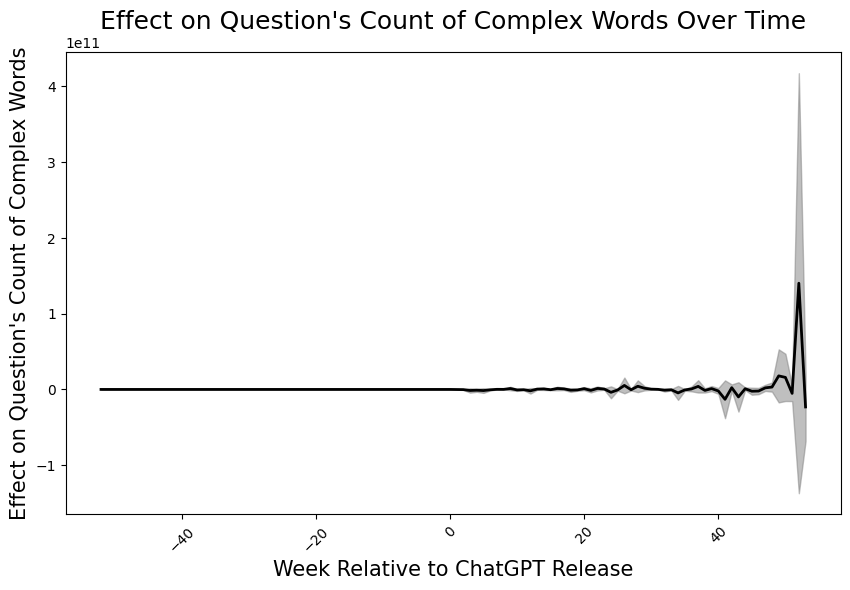

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='period', y='Estimate', data=coefs_, linewidth=2, color='black')
plt.fill_between(coefs_['period'], coefs_['ll_95'], coefs_['ul_95'], color='gray', alpha=0.5)
# sns.scatterplot(x='period', y='Estimate', data=coefs_, s=100, color='black')
# plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
# plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Week Relative to ChatGPT Release", fontsize=15)
plt.ylabel("Effect on Question's Count of Complex Words", fontsize=15)
plt.xticks(rotation=45)
plt.title("Effect on Question's Count of Complex Words Over Time", fontsize=18)
plt.show()


In [ ]:
arr_str = ' '.join(arr)

In [ ]:
wordcloud = WordCloud().generate(arr_str)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)   # wordcloud 객체를 넣으면 워드클라우드 형태의 그래프 생성
plt.axis('off')  #눈금 삭제 
plt.show()